In [155]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from scipy.spatial import ConvexHull

In [62]:
S = {(-1,-1,-1),(0,0,0),(3,0,0),(0,2,0),(0,0,2)}

3 2 2
36


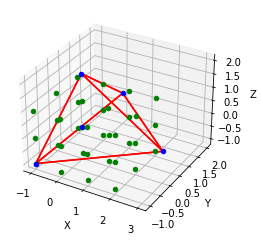

In [210]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def draw_all_integral_points(S) :
    dx = -1
    dy = -1
    dz = -1
    
    for (i,j,k) in S :
        if i > dx :
            dx = i
        if j > dy :
            dy = j
        if k > dz :
            dz = k
    cpt = 0
    print(dx,dy,dz)
    for i in range (-1,dx) :
        for j in range (-1,dy) :
            for k in range (-1,dz) :
                cpt += 1
                ax.scatter3D(i,j,k,color = "green")
    print(cpt)

def draw_points(S) :

    for (i,j,k) in S :
        ax.scatter3D(i,j,k,color = "blue")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
def draw_convex_hull(S) :
    
    pts = np.array(list(S))
    hull = ConvexHull(pts)
    
    sommets = set()
    for s in hull.simplices:
    
        s = np.append(s, s[0])  # Here we cycle back to the first coordinate
        #print("S:",S)
        #print("s:",s)
        #print("x:",pts[s, 0])
        #print("y:",pts[s, 1])
        #print("z:",pts[s, 2])
        #print("\n")
        x = pts[s, 0]
        y = pts[s, 1]
        z = pts[s, 2]
        for i in range (0,len(x)-1) :
            sommets.add((x[i],y[i],z[i]))
        ax.plot(x,y,z, "r-")
    return sommets
        
def draw_all(S):
    
    draw_all_integral_points(S)
    draw_points(S)
    sommets = draw_convex_hull(S)

draw_all(S)
  
